<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/%EA%B3%B5%EA%B3%B5%EC%A1%B0%EB%8B%AC_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 14.6 MB/s 
     |████████████████████████████████| 56 kB 2.2 MB/s 
     |████████████████████████████████| 6.8 MB 15.8 MB/s 
     |████████████████████████████████| 271 kB 44.7 MB/s 
     |████████████████████████████████| 1.7 MB 42.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 114 kB 13.6 MB/s 
     |████████████████████████████████| 167 kB 48.9 MB/s 
     |████████████████████████████████| 15.6 MB 36.1 MB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
     |████████████████████████████████| 261 kB 39.3 MB/s 
     |████████████████████████████████| 2.0 MB 46.0 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 3.1 MB 49.0 MB/s 
     |████████████████████████████████| 675 kB 33.7 MB/s 
     |████████████████

In [ ]:
# read csv file
import pandas as pd
import numpy as np
data = pd.read_csv('12등_금속제창.csv')
data['납품요구접수일자'] = pd.to_datetime(data['납품요구접수일자'])

In [ ]:
import plotly.express as px
fig = px.line(data, x="납품요구접수일자", y=["증감납품요구수량"], template = 'plotly_dark')
fig.show()

In [ ]:
# split data into train-test set
split_ratio = 0.8
split = int(len(data)*split_ratio)
train = data[:split]
test = data[split:]

In [ ]:
from pycaret.regression import *
reg = setup(train, target = '증감납품요구수량', train_size=0.8)

,Description,Value
0,session_id,3542
1,Target,증감납품요구수량
2,Original Data,"(1144, 2)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(915, 21)"


In [ ]:
##모델비교
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,41790.5460,3.303971e+09,57334.6592,0.3507,1.0204,4.1155,0.066
br,Bayesian Ridge,42803.1677,3.331903e+09,57586.2421,0.3462,1.0469,6.3662,0.017
ridge,Ridge Regression,42878.9117,3.331857e+09,57589.6242,0.3458,1.0574,6.6300,0.015
llar,Lasso Least Angle Regression,42943.7558,3.333630e+09,57607.4023,0.3452,1.0637,6.8144,0.018
lar,Least Angle Regression,42951.5213,3.333812e+09,57609.4852,0.3451,1.0644,6.8313,0.019
lasso,Lasso Regression,42950.2520,3.333820e+09,57609.5340,0.3451,1.0643,6.8282,0.023
lightgbm,Light Gradient Boosting Machine,42082.4111,3.348927e+09,57713.8686,0.3434,0.9958,4.6421,0.038
lr,Linear Regression,43173.6781,3.361903e+09,57846.4336,0.3402,1.0636,6.5064,0.014
huber,Huber Regressor,41968.5096,3.406194e+09,58171.9065,0.3346,1.0158,5.6240,0.029
rf,Random Forest Regressor,42322.7119,3.425074e+09,58338.6803,0.3274,0.9851,4.3143,0.475


In [ ]:
model = create_model(best, cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43379.6433,3.477803e+09,58972.8988,0.4111,1.3021,58.4997


In [ ]:
##하이퍼파라미터 튜닝
tuned_model = tune_model(model, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38855.6626,2.577596e+09,50770.0325,0.3417,1.0235,3.4569
1,43204.6551,3.569960e+09,59749.1418,0.2907,0.8952,1.7140
2,44460.5724,3.614199e+09,60118.2073,0.3610,1.1363,17.6381
3,40564.2973,3.202191e+09,56587.9038,0.4373,0.9205,4.0316
4,41123.3498,3.292467e+09,57380.0196,0.4325,1.2275,7.6181
5,42977.6889,3.885933e+09,62337.2524,0.2445,1.1296,3.3806
6,43200.3658,3.785600e+09,61527.2294,0.4163,1.0423,6.0845
7,38137.7070,2.355985e+09,48538.4862,0.3847,1.0211,1.9848
8,43506.3927,3.222300e+09,56765.3027,0.2982,0.9597,2.7793
9,44041.3852,3.696726e+09,60800.7101,0.2900,0.9438,1.9438


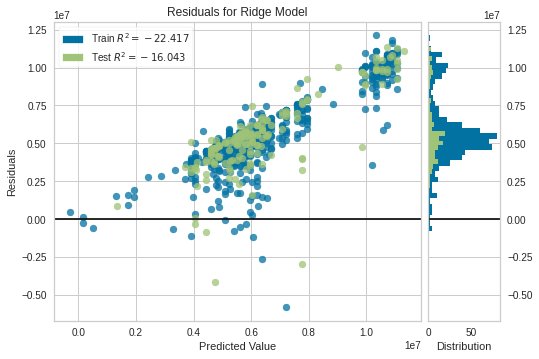

In [ ]:
# 모델 시각화(plot)_plot = 'residuals'
plot_model(tuned_model)

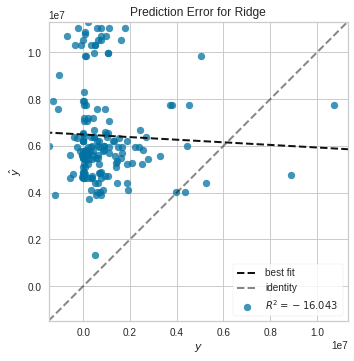

In [ ]:
# 모델 시각화(plot)_plot = 'error'
plot_model(tuned_model, plot='error')

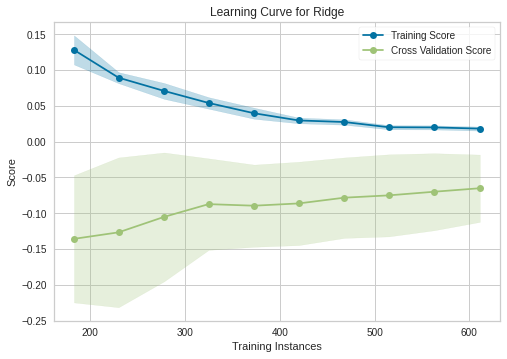

In [ ]:
# 모델 시각화(plot)_plot = 'learning'

plot_model(tuned_model, plot='learning')

In [ ]:
# 마지막 학습(Finalize)

final_model = finalize_model(tuned_model)


# 예측(Predict)

pred = predict_model(final_model, data = test)

In [ ]:
fig = px.line(pred, x="납품요구접수일자", y=["증감납품요구수량", "Label"], template = 'plotly_dark')
fig.show()